##  WIND FORECASTING USING K-MEANS AND DEEP NEURAL NETWORK

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


names = ['Power','Wind Direction', 'Wind Speed', 'Temperature', 'Pressure', 'Density']
data = pd.read_csv('/Users/daveo30/Desktop/DWDM Project/TD.csv', names=names)

                   
print("\t\t\t\tWIND FORECASTING DATASET\n\n\n")
print("The number of tupls vs attributes of the dataset are:")
print(data.shape)
print("\n\n\n")

print("Initial few tuples are: \n")
print(data.head())
print("\n\n\n")                   

				WIND FORECASTING DATASET



The number of tupls vs attributes of the dataset are:
(3000, 6)




Initial few tuples are: 

   Power  Wind Direction  Wind Speed  Temperature    Pressure  Density
0  0.668         319.914       6.519      277.955  100892.168    1.240
1  0.637         319.876       6.418      277.878  100894.912    1.240
2  0.607         320.195       6.320      277.799  100897.656    1.240
3  0.563         319.953       6.177      277.665  100906.816    1.240
4  0.521         320.701       6.039      277.494  100906.816    1.241






The Dataset Description can be viewed as follows

             Power  Wind Direction   Wind Speed  Temperature       Pressure  \
count  3000.000000     3000.000000  3000.000000  3000.000000    3000.000000   
mean      1.084307      268.376159     7.594241   274.029058  100795.292325   
std       0.700270       56.247664     2.800689     4.840671     562.721775   
min       0.000000        0.026000     0.314000   261.569000   99780.680000   
25%       0.438000      243.926250     5.660250   271.787000  100290.648000   
50%       1.136500      270.897000     7.783500   274.121500  100712.712000   
75%       1.796000      309.282750     9.778000   277.054000  101187.662000   
max       2.000000      359.982000    14.163000   285.093000  102001.824000   

           Density  
count  3000.000000  
mean      1.262555  
std       0.028089  
min       1.212000  
25%       1.244000  
50%       1.260000  
75%       1.281250  
max       1.338000  






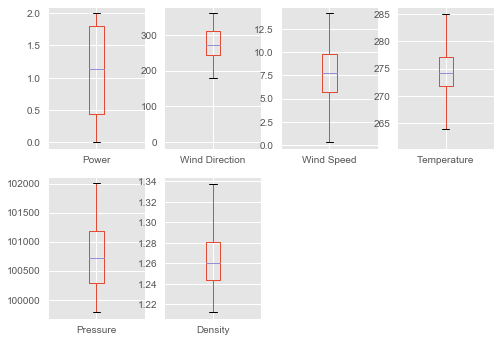

In [9]:
print(data.describe())
print("\n\n\n") 

data.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(8,12))
plt.show()
print("\n\n")
#print(data.groupby("Power").size())

The Bar Graphs for every attribute are as plotted below

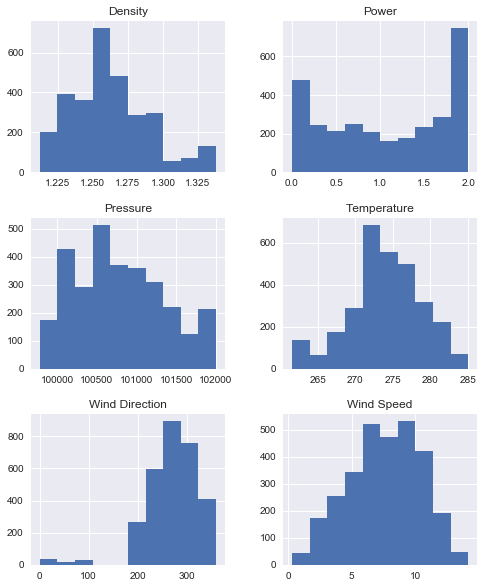

In [3]:
data.hist(figsize=(8,10))
plt.show()
print("\n\n\n")

The correlation between each of the attributes:

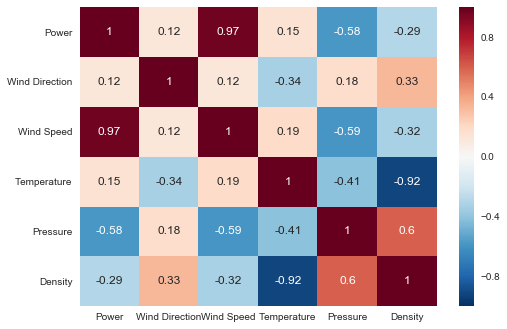

In [4]:
column=data.columns[0:len(data.columns)-1]
corr=data[data.columns].corr()
sns.heatmap(corr, annot= True)
plt.show()

Thus, we see that Wind Power is most correlated to Wind Speed

On applying MinMax to normalize the given Dataset:

In [10]:
from sklearn.preprocessing import MinMaxScaler


names = ['Power','Wind Direction', 'Wind Speed', 'Temperature', 'Pressure', 'Density']
df = pd.read_csv('/Users/daveo30/Desktop/DWDM Project/TD.csv', names=names)
df

array = df.values
# separate array into input and output components
X = array[:,:]
Y = array[:,:]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=5)
print(rescaledX[0:,:])
df2 = pd.DataFrame(data=rescaledX)

df2.to_csv('/Users/daveo30/Desktop/DWDM Project/PostMinMax.csv', header=False, index=False)

[[ 0.334    0.88869  0.44805  0.69657  0.50041  0.22222]
 [ 0.3185   0.88858  0.44075  0.69329  0.50165  0.22222]
 [ 0.3035   0.88947  0.43368  0.68993  0.50288  0.22222]
 ..., 
 [ 0.       0.21035  0.12138  0.67306  0.64015  0.38095]
 [ 0.       0.21533  0.12181  0.67799  0.63891  0.37302]
 [ 0.       0.22142  0.1234   0.68164  0.63767  0.37302]]


On applying KMeans to reduce the Dataset:
(We use the most correlated attributes to plot the Scatter Graph depicting the clusters)

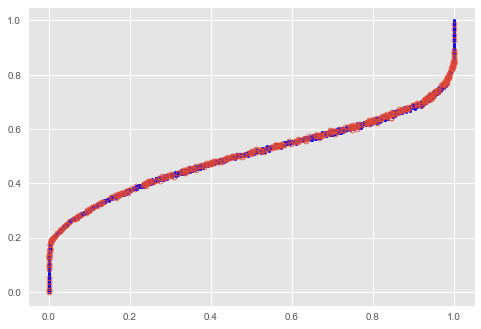

In [11]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import style
style.use("ggplot")
names = ['P','WD', 'WS', 'TEMP', 'PRESS', 'DENSITY']
df = pd.read_csv('/Users/daveo30/Desktop/DWDM Project/PostMinMax.csv', names=names, skiprows=1 )
df

array = df.values
# separate array into input and output components
X = array[:,:]
kmeans = KMeans(n_clusters=500, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

colors = ["b."]

for i in range(len(X)):
#    print ("coordinate:",X[i], labels[i])
     plt.plot(X[i][0], X[i][2], colors[0], markersize = 6)
    
    
plt.scatter(centroids[:,0], centroids[:,2], marker='.', s=2, linewidths =5, zorder=10)
plt.show()

df2 = pd.DataFrame(centroids)
df2.to_csv('/Users/daveo30/Desktop/DWDM Project/PostKMeans.csv', header=False, index=False)

In [12]:
import tflearn
import tensorflow as tf




# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv


data, labels = load_csv('/Users/daveo30/Desktop/DWDM Project/PostKMeans.csv', target_column=0,
                        categorical_labels=False)



net = tflearn.input_data(shape=[None, 5])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 1, activation='sigmoid')
net = tflearn.reshape(net,[-1])
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(data, labels, n_epoch=5, batch_size=32 , show_metric=True)


# Predict surviving chances (class 1 results)
X = np.array([0.832283205,0.317582497,0.705220201,0.789584466,0.398941799])
# X = np.reshape(X,[-1,1])
print(X)
pred = model.predict([X])
print("P5:", pred[0])
#print("P10:", pred[1][1])

IndexError: list index out of range